# Lecture 1 - Code
By: Talal Alrawajfeh, ProgressSoft

## Gradient Descent
$$x_{n+1} = x_{n} - \lambda f'(x_{n})$$
Example:
Let $f(x) = x^2$, then $f'(x) = 2x$

In [ ]:
def gradient_descent(derivative,
                     start_value,
                     learning_rate,
                     stop_derivative=0.0001,
                     stop_iterations=10000):
    x = start_value
    for i in range(stop_iterations):
        print(f'current x = {x}')
        x = x - learning_rate * derivative(x)
        if abs(derivative(x)) < stop_derivative:
            print(f'stopped at x = {x}')
            return x
    print(f'stopped at x = {x}')
    return x


min_x = gradient_descent(derivative=lambda x: 2 * x,
                         start_value=2,
                         learning_rate=0.25)

print(f'function has minimum at x = {min_x} which is {min_x**2}')

current x = 2
current x = 1.0
current x = 0.5
current x = 0.25
current x = 0.125
current x = 0.0625
current x = 0.03125
current x = 0.015625
current x = 0.0078125
current x = 0.00390625
current x = 0.001953125
current x = 0.0009765625
current x = 0.00048828125
current x = 0.000244140625
current x = 0.0001220703125
current x = 6.103515625e-05
stopped at x = 3.0517578125e-05
function has minimum at x = 3.0517578125e-05 which is 9.313225746154785e-10


## Simple Linear Regression using formula

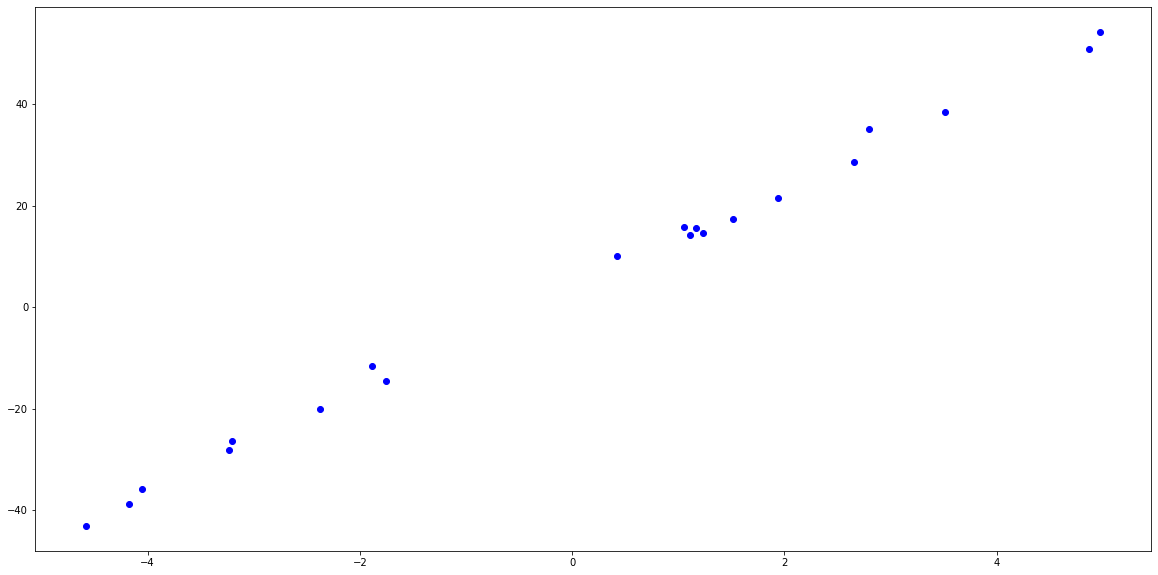

In [ ]:
import random
from matplotlib import pyplot as plt

xs = [random.uniform(-5, 5) for _ in range(20)]
a = 10
b = 5
ys = [x * a + b + random.uniform(-3, 3) for x in xs]

plt.figure(figsize=(20, 10))
plt.scatter(xs, ys, color='blue')

In [ ]:
n = len(xs)
x_avg = sum(xs) / n
y_avg = sum(ys) / n
a_hat = sum([(xs[m] - x_avg) * (ys[m] - y_avg) for m in range(n)]) / sum([(xs[m] - x_avg) ** 2 for m in range(n)])
b_hat = y_avg - a_hat * x_avg
print(f'a_hat = {a_hat}, b_hat = {b_hat}')

a_hat = 9.903619298443292, b_hat = 3.915845477531137


In [ ]:
loss = sum([(a_hat * xs[m] + b_hat - ys[m]) ** 2 for m in range(n)]) / n
print(f'loss = {loss}')

loss = 2.473884438135485


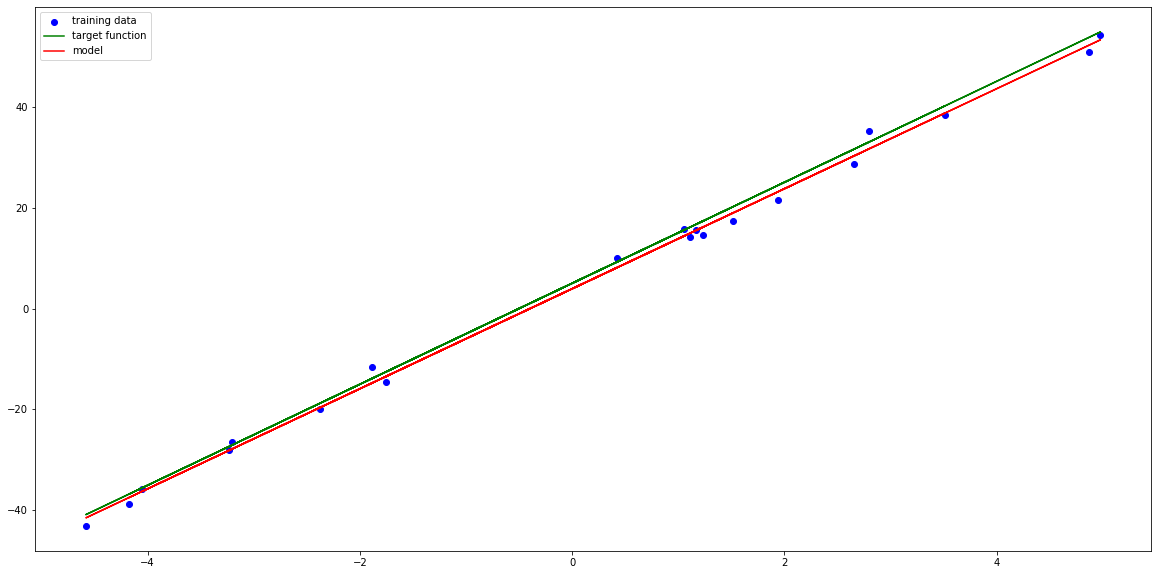

In [ ]:
predictions = [x * a_hat + b_hat for x in xs]
actual = [x * a + b for x in xs]

plt.figure(figsize=(20, 10))
scatter_points = plt.scatter(xs, ys, color='blue')
actual_plot, = plt.plot(xs, actual, color='green')
predictions_plot, = plt.plot(xs, predictions, color='red')
plt.legend([scatter_points, actual_plot, predictions_plot], ['training data', 'target function', 'model'])

## Simple Linear Regression using scikit-learn

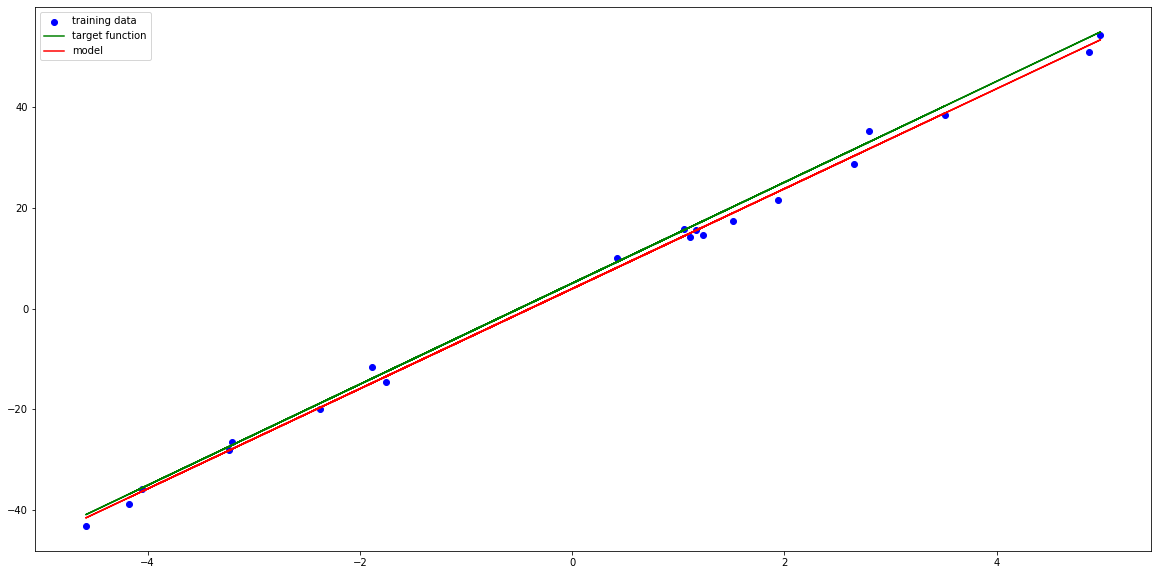

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

xs_tensor = np.array(xs).reshape(-1, 1)
reg = LinearRegression().fit(xs_tensor, np.array(ys))
predicted_tensor = reg.predict(xs_tensor)

plt.figure(figsize=(20, 10))
scatter_points = plt.scatter(xs, ys, color='blue')
actual_plot, = plt.plot(xs, actual, color='green')
predictions_plot, = plt.plot(xs_tensor, predicted_tensor, color='red')
plt.legend([scatter_points, actual_plot, predictions_plot], ['training data', 'target function', 'model'])

## Multivariate Linear Regression using scikit-learn

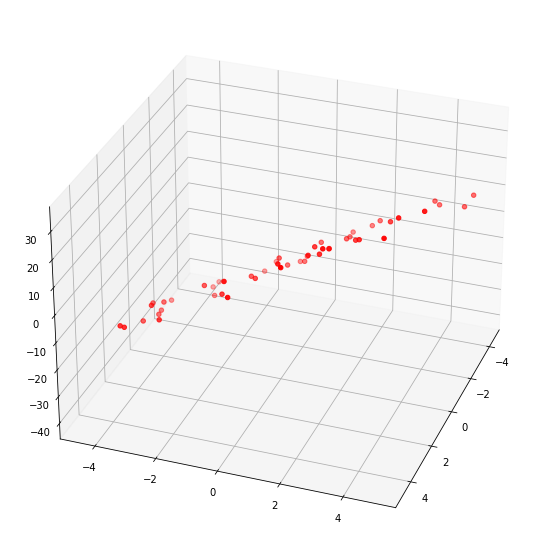

In [ ]:
w_1 = 4
w_2 = 6
b = -3

n = 50
x_1s = [random.uniform(-5, 5) for _ in range(n)]
x_2s = [random.uniform(-5, 5) for _ in range(n)]
ys = [w_1 * x_1s[i] + w_2 * x_2s[i] + b + random.randint(-3, 3) for i in range(n)]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x_1s, x_2s, ys, color='red')
ax.view_init(30, 20)

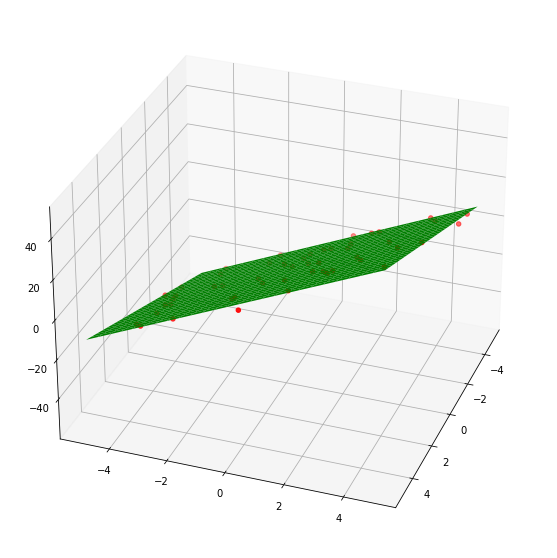

In [ ]:
xs = [[x_1s[i], x_2s[i]] for i in range(n)]

mul_reg = LinearRegression().fit(np.array(xs), np.array(ys))

plot_x = np.arange(-5, 5.1, 0.2)
plot_y = np.arange(-5, 5.1, 0.2)
mesh_x, mesh_y = np.meshgrid(plot_x, plot_y)

mesh_z = np.concatenate([np.expand_dims(mesh_x, axis=-1), np.expand_dims(mesh_y, axis=-1)], axis=-1)
mesh_z = [mul_reg.predict(mesh_z[i]) for i in range(mesh_z.shape[0])]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mesh_x, mesh_y, np.array(mesh_z), color='green')
ax.scatter3D(x_1s, x_2s, ys, color='red')
ax.view_init(30, 20)
